## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#--------------Evaluasi--------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import tensorflow as tf

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# 1. Exploratory Data Analysis

In [2]:
dataset = pd.read_excel("skrining _skripsi hilda.xlsx")
dataset

,TANGGAL LAHIR *,JENIS KELAMIN *,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis
0,27-05-1994,PEREMPUAN,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,110,70,Tidak Hipertensi
1,30-04-1993,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,120,80,Tidak Hipertensi
2,27-03-1999,PEREMPUAN,TIDAK,YA,TIDAK,TIDAK,YA,YA,TIDAK,115,78,Tidak Hipertensi
3,22-06-1983,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,112,78,Tidak Hipertensi
4,07-04-1998,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,98,69,Tidak Hipertensi
...,...,...,...,...,...,...,...,...,...,...,...,...
1368,09-04-1938,PEREMPUAN,TIDAK,TIDAK,YA,TIDAK,TIDAK,TIDAK,TIDAK,170,70,Tidak Hipertensi
1369,20-07-1961,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,116,72,Tidak Hipertensi
1370,20-04-1957,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,YA,TIDAK,155,52,Tidak Hipertensi
1371,01-01-1980,PEREMPUAN,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,140,85,Hipertensi


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   TANGGAL LAHIR *              1373 non-null   object
 1   JENIS KELAMIN *              1373 non-null   object
 2   MEROKOK                      1373 non-null   object
 3   KURANG AKTIFITAS FISIK       1373 non-null   object
 4   GULA BERLEBIHAN              1373 non-null   object
 5   GARAM BERLEBIHAN             1373 non-null   object
 6   LEMAK BERLEBIHAN             1373 non-null   object
 7   KURANG MAKAN BUAH DAN SAYUR  1373 non-null   object
 8   KONSUMSI ALKOHOL             1373 non-null   object
 9   SISTOL                       1373 non-null   int64 
 10  DIASTOL                      1373 non-null   int64 
 11  Diagnosis                    1373 non-null   object
dtypes: int64(2), object(10)
memory usage: 128.8+ KB


In [4]:
dataset.describe()

,SISTOL,DIASTOL
count,1373.000000,1373.000000
mean,132.364894,80.231610
std,22.399048,11.580506
min,81.000000,11.000000
25%,117.000000,72.000000
50%,130.000000,80.000000
75%,147.000000,88.000000
max,240.000000,155.000000


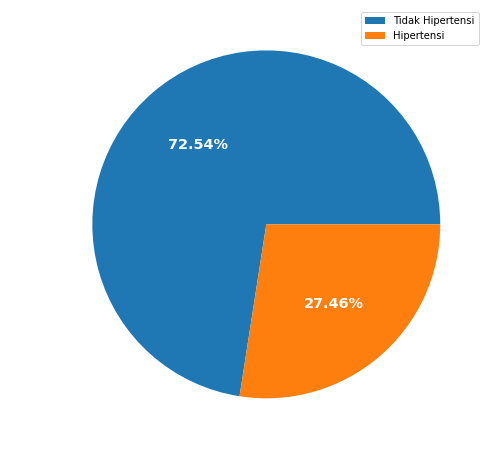

In [5]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(dataset['Diagnosis']), 
        labels = ['Tidak Hipertensi','Hipertensi'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '0',
                     'color' : 'w'})

plt.legend()
# plt.title('Persentase hipertensi', fontsize = 15, fontweight = 'bold')
plt.show()

In [6]:
dataset["Diagnosis"].value_counts()

Tidak Hipertensi    996
Hipertensi          377
Name: Diagnosis, dtype: int64

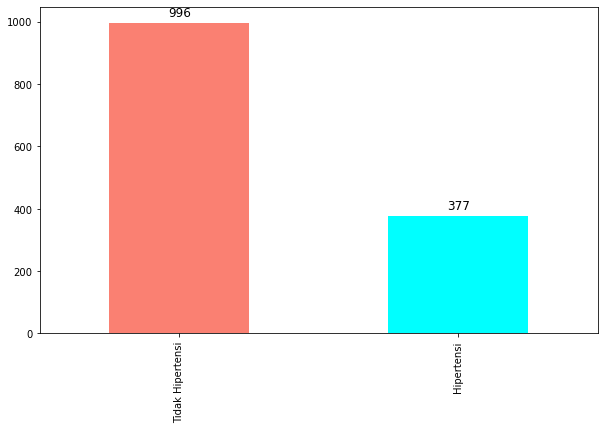

In [7]:
# Buat plot
plt.figure(figsize=(10, 6))
plot = dataset["Diagnosis"].value_counts().plot(kind="bar", color=['salmon', 'aqua'])

# Tambahkan label jumlah di atas setiap bar plot
for i in plot.patches:
    plt.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

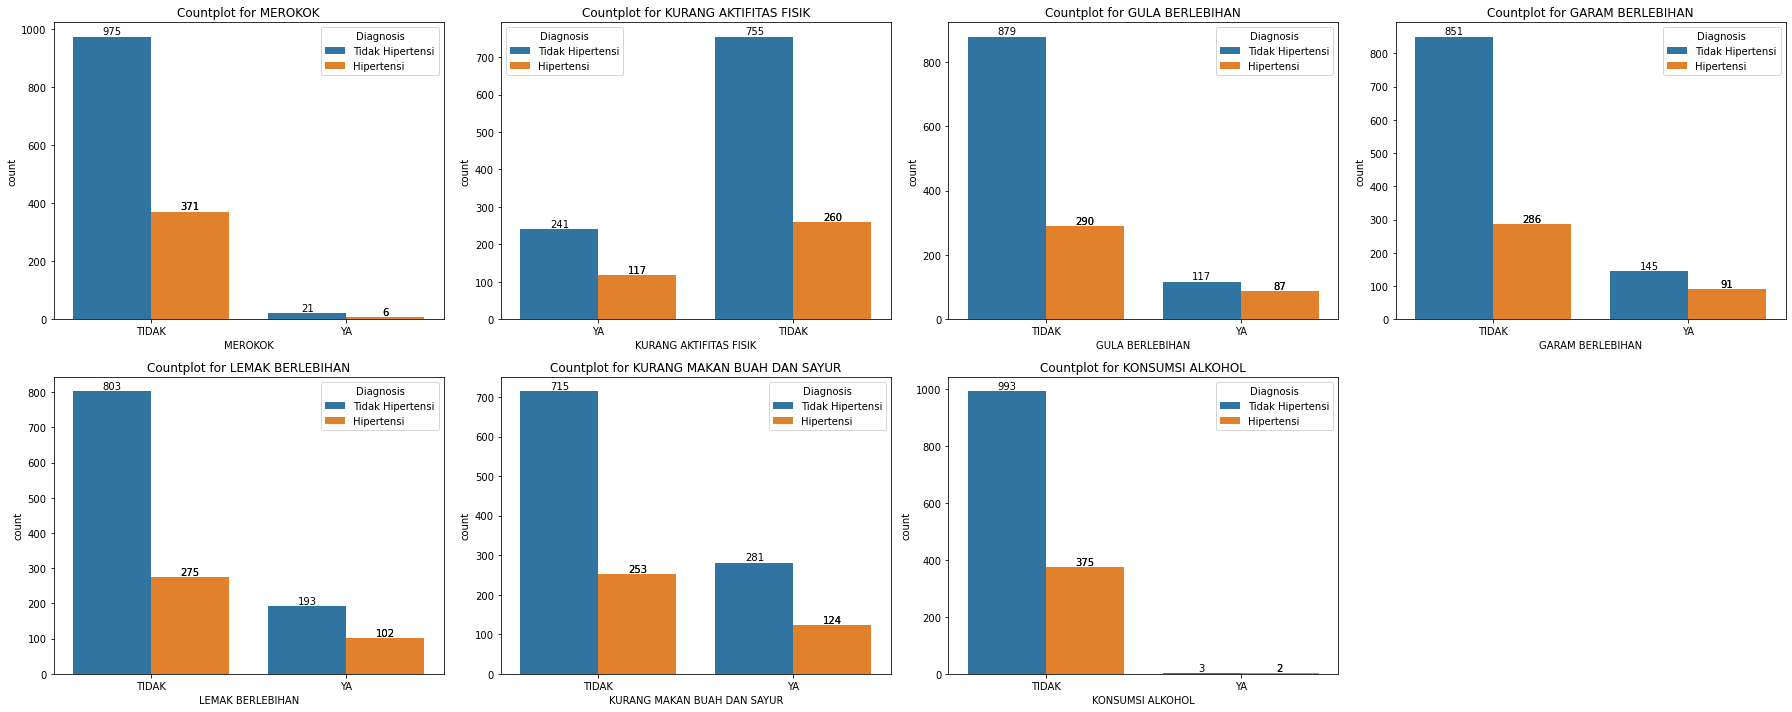

In [11]:
# Categorical Bivariate Analysis
cat = ['MEROKOK', 'KURANG AKTIFITAS FISIK', 'GULA BERLEBIHAN', 'GARAM BERLEBIHAN', 'LEMAK BERLEBIHAN', 'KURANG MAKAN BUAH DAN SAYUR', 'KONSUMSI ALKOHOL']
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
import matplotlib.patches as mpatches  # Not used in this specific solution, but potentially useful

for i, attribute in enumerate(cat, 1):
  plt.subplot(2, 4, i)
  bars = sns.countplot(data=dataset, x=attribute, hue='Diagnosis')  # Get BarContainer

  # Access individual bar heights
  for bar in bars.containers[0]:  # Assuming first hue category
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, height, ha='center', va='bottom')

    for bar in bars.containers[1]:  # Assuming first hue category
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, height, ha='center', va='bottom')
    
  plt.title(f'Countplot for {attribute}')
  plt.tight_layout()

plt.show()

# 2. Data Preprocessing

Data Transformation

In [9]:
dataset['MEROKOK'] = dataset['MEROKOK'].map({'YA': 1, 'TIDAK': 0})
dataset['KURANG AKTIFITAS FISIK'] = dataset['KURANG AKTIFITAS FISIK'].map({'YA': 1, 'TIDAK': 0})
dataset['GULA BERLEBIHAN'] = dataset['GULA BERLEBIHAN'].map({'YA': 1, 'TIDAK': 0})
dataset['LEMAK BERLEBIHAN'] = dataset['LEMAK BERLEBIHAN'].map({'YA': 1, 'TIDAK': 0})
dataset['KURANG MAKAN BUAH DAN SAYUR'] = dataset['KURANG MAKAN BUAH DAN SAYUR'].map({'YA': 1, 'TIDAK': 0})
dataset['KONSUMSI ALKOHOL'] = dataset['KONSUMSI ALKOHOL'].map({'YA': 1, 'TIDAK': 0})
dataset['GARAM BERLEBIHAN'] = dataset['GARAM BERLEBIHAN'].map({'YA': 1, 'TIDAK': 0})

In [10]:
dataset['Diagnosis'] = dataset['Diagnosis'].map({'Hipertensi': 1, 'Tidak Hipertensi': 0})

In [11]:
dataset

,TANGGAL LAHIR *,JENIS KELAMIN *,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis
0,27-05-1994,PEREMPUAN,0,1,0,0,0,0,0,110,70,0
1,30-04-1993,PEREMPUAN,0,0,0,0,0,0,0,120,80,0
2,27-03-1999,PEREMPUAN,0,1,0,0,1,1,0,115,78,0
3,22-06-1983,PEREMPUAN,0,0,0,0,0,0,0,112,78,0
4,07-04-1998,PEREMPUAN,0,0,0,0,0,0,0,98,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1368,09-04-1938,PEREMPUAN,0,0,1,0,0,0,0,170,70,0
1369,20-07-1961,PEREMPUAN,0,0,0,0,0,1,0,116,72,0
1370,20-04-1957,PEREMPUAN,0,0,0,0,0,1,0,155,52,0
1371,01-01-1980,PEREMPUAN,0,0,0,0,0,0,0,140,85,1


 Data Cleaning

In [12]:
dataset = dataset.drop(["JENIS KELAMIN *"], axis=1)
dataset

,TANGGAL LAHIR *,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis
0,27-05-1994,0,1,0,0,0,0,0,110,70,0
1,30-04-1993,0,0,0,0,0,0,0,120,80,0
2,27-03-1999,0,1,0,0,1,1,0,115,78,0
3,22-06-1983,0,0,0,0,0,0,0,112,78,0
4,07-04-1998,0,0,0,0,0,0,0,98,69,0
...,...,...,...,...,...,...,...,...,...,...,...
1368,09-04-1938,0,0,1,0,0,0,0,170,70,0
1369,20-07-1961,0,0,0,0,0,1,0,116,72,0
1370,20-04-1957,0,0,0,0,0,1,0,155,52,0
1371,01-01-1980,0,0,0,0,0,0,0,140,85,1


In [13]:
dataset.duplicated().sum()

42

Data Transformation (From Birth Date to Age)

In [14]:
import datetime
from datetime import datetime

In [15]:
dataset["TANGGAL LAHIR *"] = pd.to_datetime(dataset["TANGGAL LAHIR *"], format="%d-%m-%Y",errors="coerce")

In [17]:
today_date = datetime.today().replace(day=1, month=1).date()  # Konversi ke datetime.date
dataset["Usia"] = (today_date - dataset["TANGGAL LAHIR *"].dt.date).apply(lambda x: x.days) // 365.25

In [18]:
print(dataset["Usia"].isna().sum())  # Menampilkan jumlah nilai NaN

2


In [19]:
print(dataset.loc[dataset["TANGGAL LAHIR *"].isna()])

     TANGGAL LAHIR *  MEROKOK  KURANG AKTIFITAS FISIK  GULA BERLEBIHAN  \
837              NaT        0                       1                1   
1057             NaT        0                       1                1   

      GARAM BERLEBIHAN  LEMAK BERLEBIHAN  KURANG MAKAN BUAH DAN SAYUR  \
837                  0                 0                            1   
1057                 1                 1                            1   

      KONSUMSI ALKOHOL  SISTOL  DIASTOL  Diagnosis  Usia  
837                  0     153       91          1   NaN  
1057                 0     200      110          1   NaN  


In [20]:
dataset.dropna(subset=['TANGGAL LAHIR *'], inplace=True)

In [21]:
dataset["Usia"] = dataset["Usia"].astype("int")

In [22]:
dataset["Usia"]

0       29
1       30
2       24
3       40
4       25
        ..
1368    85
1369    62
1370    66
1371    44
1372    77
Name: Usia, Length: 1371, dtype: int32

In [23]:
dataset = dataset.drop(["TANGGAL LAHIR *"], axis=1)

In [24]:
dataset

,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis,Usia
0,0,1,0,0,0,0,0,110,70,0,29
1,0,0,0,0,0,0,0,120,80,0,30
2,0,1,0,0,1,1,0,115,78,0,24
3,0,0,0,0,0,0,0,112,78,0,40
4,0,0,0,0,0,0,0,98,69,0,25
...,...,...,...,...,...,...,...,...,...,...,...
1368,0,0,1,0,0,0,0,170,70,0,85
1369,0,0,0,0,0,1,0,116,72,0,62
1370,0,0,0,0,0,1,0,155,52,0,66
1371,0,0,0,0,0,0,0,140,85,1,44


In [25]:
dataset.describe()

,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis,Usia
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.019694,0.259664,0.147338,0.171408,0.214442,0.293946,0.003647,132.300511,80.202042,0.273523,47.401167
std,0.138996,0.438610,0.354572,0.377002,0.410584,0.455734,0.060302,22.333736,11.557316,0.445930,15.554833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,11.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,72.000000,0.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,80.000000,0.000000,48.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,147.000000,88.000000,1.000000,59.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,240.000000,155.000000,1.000000,102.000000


Korelasi antar Variabel

In [89]:
x = dataset.corr()
x.to_csv('correlaction_variabel.csv', index=False)

In [90]:
x

,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Diagnosis,Usia
MEROKOK,1.000000,-0.024077,0.015135,0.005182,0.028267,0.058346,0.165596,0.025603,-0.018382,-0.016312,0.040570
KURANG AKTIFITAS FISIK,-0.024077,1.000000,0.044812,0.154405,0.083734,0.249609,0.019365,0.092399,0.062216,0.065778,0.045811
GULA BERLEBIHAN,0.015135,0.044812,1.000000,0.204089,0.183922,0.156397,-0.025149,0.213874,0.086245,0.137332,0.139752
GARAM BERLEBIHAN,0.005182,0.154405,0.204089,1.000000,0.186765,0.169607,0.036697,0.197948,0.112999,0.111680,0.119583
LEMAK BERLEBIHAN,0.028267,0.083734,0.183922,0.186765,1.000000,0.138794,0.027352,0.141263,0.075619,0.082063,0.062866
KURANG MAKAN BUAH DAN SAYUR,0.058346,0.249609,0.156397,0.169607,0.138794,1.000000,0.014084,0.083181,0.024886,0.042275,0.063256
KONSUMSI ALKOHOL,0.165596,0.019365,-0.025149,0.036697,0.027352,0.014084,1.000000,0.033331,0.016747,0.017166,0.021785
SISTOL,0.025603,0.092399,0.213874,0.197948,0.141263,0.083181,0.033331,1.000000,0.531745,0.565757,0.547133
DIASTOL,-0.018382,0.062216,0.086245,0.112999,0.075619,0.024886,0.016747,0.531745,1.000000,0.684391,0.137859
Diagnosis,-0.016312,0.065778,0.137332,0.111680,0.082063,0.042275,0.017166,0.565757,0.684391,1.000000,0.219468


Splitting Data

In [27]:
X = dataset.drop(["Diagnosis"], axis = 1)
Y = dataset["Diagnosis"]

Oversampling Data

In [28]:
from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
sm = SMOTE(random_state=42, sampling_strategy={0: 1000, 1: 1000})
X, Y = sm.fit_resample(X, Y)

C:\Users\Asus\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 996)
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 996)
  warnings.warn(


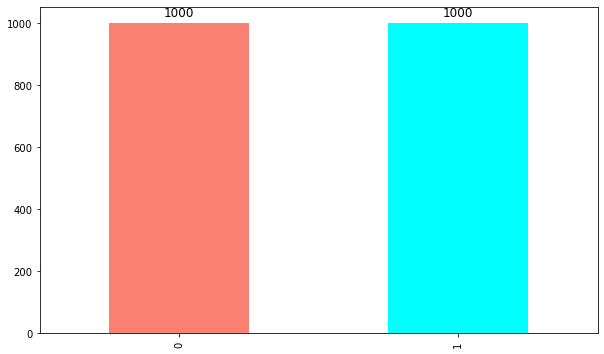

In [29]:
# Buat bar plot dari data yang telah diresample
plt.figure(figsize=(10, 6))
plot = Y.value_counts().plot(kind="bar", color=['salmon', 'aqua'])

# Tambahkan label jumlah di atas setiap bar plot
for i in plot.patches:
    plt.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

<h2>Permintaan Bu Ria </h2>
Perlakuan kedua data yang sama

In [30]:
# Oversampling kedua
sm2 = SMOTE(random_state=42, sampling_strategy={0: 1000, 1: 1000})
X_resampled2, Y_resampled2 = sm2.fit_resample(X, Y)

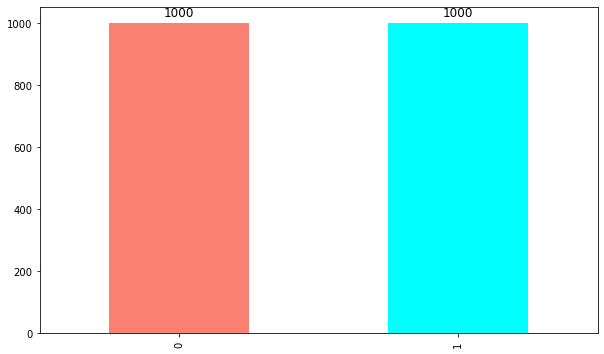

In [31]:
# Buat bar plot dari data yang telah diresample
plt.figure(figsize=(10, 6))
plot = Y_resampled2.value_counts().plot(kind="bar", color=['salmon', 'aqua'])

# Tambahkan label jumlah di atas setiap bar plot
for i in plot.patches:
    plt.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', 
                 fontsize=12, xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_resampled2, Y_resampled2, test_size = 0.2)

In [33]:
svm_rbf_4_1 = svm.SVC(kernel='rbf', C=100, gamma = 0.1).fit(X_train_2, Y_train_2)
svm_rbf_4_pred_1 = svm_rbf_4_1.predict(X_test_2)
num_support_vectors = svm_rbf_4_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test_2,svm_rbf_4_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_4_pred_1, Y_test_2))

Banyak Support Vector:
1158
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       211
           1       0.99      0.98      0.99       189

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Akurasi = 0.9875


In [34]:
svm_rbf_4_1 = svm.SVC(kernel='rbf', C=100, gamma = 0.1).fit(X_train_2, Y_train_2)

def get_metrics(estimator, X, y):
    precision = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='precision')
    recall = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='recall')
    accuracy = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='accuracy')
    return precision, recall, accuracy

precision, recall, accuracy = get_metrics(svm_rbf_4_1, X_resampled2, Y_resampled2)

df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'Accuracy': accuracy
})
print(df)

# df.to_csv('metrics_scores.csv', index=False)

   Precision    Recall  Accuracy
0   0.957983  0.942149    0.9700
1   0.975904  0.975904    0.9900
2   0.972477  0.946429    0.9775
3   1.000000  0.936620    0.9550
4   1.000000  0.965000    0.9650


Kesimpulan?

---------------------------------------

Splitting Data

In [35]:
X.isnull().any()

MEROKOK                        False
KURANG AKTIFITAS FISIK         False
GULA BERLEBIHAN                False
GARAM BERLEBIHAN               False
LEMAK BERLEBIHAN               False
KURANG MAKAN BUAH DAN SAYUR    False
KONSUMSI ALKOHOL               False
SISTOL                         False
DIASTOL                        False
Usia                           False
dtype: bool

In [36]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Diagnosis, Length: 2000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [38]:
X_train

,MEROKOK,KURANG AKTIFITAS FISIK,GULA BERLEBIHAN,GARAM BERLEBIHAN,LEMAK BERLEBIHAN,KURANG MAKAN BUAH DAN SAYUR,KONSUMSI ALKOHOL,SISTOL,DIASTOL,Usia
987,0,0,1,1,0,0,0,153,58,70
933,0,0,0,1,0,0,0,145,87,76
1104,0,0,0,0,0,1,0,110,60,31
1640,0,1,0,0,0,0,0,151,90,52
195,0,0,0,0,0,0,0,125,93,39
...,...,...,...,...,...,...,...,...,...,...
1780,0,0,0,0,1,0,0,175,97,68
399,0,0,0,0,0,0,0,154,69,62
1466,0,0,0,0,0,0,0,152,99,56
1178,0,0,0,0,0,0,0,128,79,40


In [39]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
X_train

array([[-0.1153237 , -0.51655108,  2.74055438, ...,  0.60536617,
        -2.20084845,  1.41010686],
       [-0.1153237 , -0.51655108, -0.36488968, ...,  0.26518323,
         0.24231553,  1.81880881],
       [-0.1153237 , -0.51655108, -0.36488968, ..., -1.22311712,
        -2.03235439, -1.24645579],
       ...,
       [-0.1153237 , -0.51655108, -0.36488968, ...,  0.5628433 ,
         1.25327994,  0.45646899],
       [-0.1153237 , -0.51655108, -0.36488968, ..., -0.45770551,
        -0.43166074, -0.63340287],
       [-0.1153237 , -0.51655108,  2.74055438, ..., -0.88293418,
        -0.34741371,  0.66081996]])

In [41]:
x1 = X_test[0]
x1

array([-0.12340351,  1.88293774, -0.38655567, -0.41181385, -0.45657334,
       -0.59274898,  0.        ,  0.4861522 ,  0.47145543,  0.19257454])

## 4. Classification

<b>Penentuan Kernel dan Parameter SVM</b>

1. Linear <br />
Percobaan C = 0,01, 0,1, 1, 10  dan 100

In [42]:
svm_linear_1 = svm.SVC(kernel='linear', C=0.01).fit(X_train, Y_train)
svm_linear_1_pred = svm_linear_1.predict(X_test)
num_support_vectors = svm_linear_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_linear_1_pred))
print("Akurasi =",accuracy_score(svm_linear_1_pred, Y_test))

Banyak Support Vector:
618
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       205
           1       0.88      0.97      0.92       195

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

Akurasi = 0.9225


In [43]:
svm_linear_2 = svm.SVC(kernel='linear', C=0.1).fit(X_train, Y_train)
svm_linear_2_pred = svm_linear_2.predict(X_test)
num_support_vectors = svm_linear_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_linear_2_pred))
print("Akurasi =",accuracy_score(svm_linear_2_pred, Y_test))

Banyak Support Vector:
316
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       205
           1       0.90      0.98      0.94       195

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Akurasi = 0.9375


In [44]:
svm_linear_3 = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
svm_linear_3_pred = svm_linear_3.predict(X_test)
num_support_vectors = svm_linear_3.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_linear_3_pred))
print("Akurasi =",accuracy_score(svm_linear_3_pred, Y_test))

Banyak Support Vector:
236
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       205
           1       0.92      0.96      0.94       195

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Akurasi = 0.94


In [45]:
svm_linear_4 = svm.SVC(kernel='linear', C=10).fit(X_train, Y_train)
svm_linear_4_pred = svm_linear_4.predict(X_test)
num_support_vectors = svm_linear_4.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_linear_4_pred))
print("Akurasi =",accuracy_score(svm_linear_4_pred, Y_test))

Banyak Support Vector:
226
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       205
           1       0.91      0.95      0.93       195

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Akurasi = 0.9325


In [46]:
svm_linear_5 = svm.SVC(kernel='linear', C=100).fit(X_train, Y_train)
svm_linear_5_pred = svm_linear_5.predict(X_test)
num_support_vectors = svm_linear_5.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_linear_5_pred))
print("Akurasi =",accuracy_score(svm_linear_5_pred, Y_test))

Banyak Support Vector:
225
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       205
           1       0.91      0.95      0.93       195

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Akurasi = 0.9325


<b>2. RBF <br>
Percobaan C = 0,01 , 0,1, 1, 10 dan 100 </b>
<b> Percobaan Gamma = 0,01, 0,1, 1, 10 dan 100 </b>

SVM RBF C = 0.01 dan Gamma = 0.01

In [47]:
svm_rbf_0 = svm.SVC(kernel='rbf', C=0.01, gamma = 0.01).fit(X_train, Y_train)
svm_rbf_0_pred = svm_rbf_0.predict(X_test)
num_support_vectors = svm_rbf_0.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_0_pred))
print("Akurasi =",accuracy_score(svm_rbf_0_pred, Y_test))

Banyak Support Vector:
1590
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       205
           1       0.75      0.98      0.85       195

    accuracy                           0.83       400
   macro avg       0.86      0.84      0.83       400
weighted avg       0.87      0.83      0.83       400

Akurasi = 0.835


SVM RBF C = 0.01 dan Gamma = 0.1

In [48]:
svm_rbf_0_1 = svm.SVC(kernel='rbf', C=0.01, gamma = 0.1).fit(X_train, Y_train)
svm_rbf_0_pred_1 = svm_rbf_0_1.predict(X_test)
num_support_vectors = svm_rbf_0_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_0_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_0_pred_1, Y_test))

Banyak Support Vector:
1382
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       205
           1       0.85      0.88      0.87       195

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Akurasi = 0.8675


SVM RBF C = 0.01 dan Gamma = 1

In [49]:
svm_rbf_0_2 = svm.SVC(kernel='rbf', C=0.01, gamma = 1).fit(X_train, Y_train)
svm_rbf_0_pred_2 = svm_rbf_0_2.predict(X_test)
num_support_vectors = svm_rbf_0_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_0_pred_2))
print("Akurasi =",accuracy_score(svm_rbf_0_pred_2, Y_test))

Banyak Support Vector:
1578
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       205
           1       0.90      0.53      0.66       195

    accuracy                           0.74       400
   macro avg       0.79      0.73      0.73       400
weighted avg       0.78      0.74      0.73       400

Akurasi = 0.74


SVM RBF C = 0.01 dan Gamma = 10

In [50]:
svm_rbf_0_3 = svm.SVC(kernel='rbf', C=0.01, gamma = 10).fit(X_train, Y_train)
svm_rbf_0_pred_3 = svm_rbf_0_3.predict(X_test)
num_support_vectors = svm_rbf_0_3.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_0_pred_3))
print("Akurasi =",accuracy_score(svm_rbf_0_pred_3, Y_test))

Banyak Support Vector:
1592
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.49      1.00      0.66       195

    accuracy                           0.49       400
   macro avg       0.24      0.50      0.33       400
weighted avg       0.24      0.49      0.32       400

Akurasi = 0.4875


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM RBF C = 0.1 dan Gamma = 0.01

In [51]:
svm_rbf_1_0 = svm.SVC(kernel='rbf', C=0.1, gamma = 0.01).fit(X_train, Y_train)
svm_rbf_1_pred_0 = svm_rbf_1_0.predict(X_test)
num_support_vectors = svm_rbf_1_0.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_1_pred_0))
print("Akurasi =",accuracy_score(svm_rbf_1_pred_0, Y_test))

Banyak Support Vector:
1016
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       205
           1       0.84      0.96      0.89       195

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Akurasi = 0.89


SVM RBF C = 0.1 dan Gamma = 0.1

In [52]:
svm_rbf_1_1 = svm.SVC(kernel='rbf', C=0.1, gamma = 0.1).fit(X_train, Y_train)
svm_rbf_1_pred_1 = svm_rbf_1_1.predict(X_test)
num_support_vectors = svm_rbf_1_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_1_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_1_pred_1, Y_test))

Banyak Support Vector:
736
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       205
           1       0.88      0.97      0.92       195

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

Akurasi = 0.92


SVM RBF C= 0.1 dan Gamma = 1

In [53]:
svm_rbf_1_2 = svm.SVC(kernel='rbf', C=0.1, gamma = 1).fit(X_train, Y_train)
svm_rbf_1_pred_2 = svm_rbf_1_2.predict(X_test)
num_support_vectors = svm_rbf_1_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_1_pred_2))
print("Akurasi =",accuracy_score(svm_rbf_1_pred_2, Y_test))

Banyak Support Vector:
1093
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       205
           1       0.92      0.80      0.85       195

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Akurasi = 0.8675


SVM RBF C= 0.1 dan Gamma = 10

In [54]:
svm_rbf_1_3 = svm.SVC(kernel='rbf', C=0.1, gamma = 10).fit(X_train, Y_train)
svm_rbf_1_pred_3 = svm_rbf_1_3.predict(X_test)
num_support_vectors = svm_rbf_1_3.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_1_pred_3))
print("Akurasi =",accuracy_score(svm_rbf_1_pred_3, Y_test))

Banyak Support Vector:
1537
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       205
           1       0.99      0.47      0.64       195

    accuracy                           0.74       400
   macro avg       0.83      0.73      0.72       400
weighted avg       0.82      0.74      0.72       400

Akurasi = 0.74


SVM RBF C = 1 dan Gamma = 0.01

In [55]:
svm_rbf_2_0 = svm.SVC(kernel='rbf', C=1, gamma = 0.01).fit(X_train, Y_train)
svm_rbf_2_pred_0 = svm_rbf_2_0.predict(X_test)
num_support_vectors = svm_rbf_2_0.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_2_pred_0))
print("Akurasi =",accuracy_score(svm_rbf_2_pred_0, Y_test))

Banyak Support Vector:
514
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       205
           1       0.89      0.96      0.92       195

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

Akurasi = 0.9225


SVM RBF C = 1 dan Gamma = 0.1

In [56]:
svm_rbf_2_1 = svm.SVC(kernel='rbf', C=1, gamma = 0.1).fit(X_train, Y_train)
svm_rbf_2_pred_1 = svm_rbf_2_1.predict(X_test)
num_support_vectors = svm_rbf_2_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_2_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_2_pred_1, Y_test))

Banyak Support Vector:
369
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       205
           1       0.92      0.97      0.95       195

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Akurasi = 0.9475


SVM RBF C = 1 dan Gamma = 1

In [57]:
svm_rbf_2 = svm.SVC(kernel='rbf', C=1, gamma = 1).fit(X_train, Y_train)
svm_rbf_2_pred = svm_rbf_2.predict(X_test)
num_support_vectors = svm_rbf_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_2_pred))
print("Akurasi =",accuracy_score(svm_rbf_2_pred, Y_test))

Banyak Support Vector:
661
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       205
           1       0.94      0.95      0.95       195

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Akurasi = 0.9475


SVM RBF C = 1 dan Gamma = 10

In [58]:
svm_rbf_2_3 = svm.SVC(kernel='rbf', C=1, gamma = 10).fit(X_train, Y_train)
svm_rbf_2_pred_3 = svm_rbf_2_3.predict(X_test)
num_support_vectors = svm_rbf_2_3.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_2_pred_3))
print("Akurasi =",accuracy_score(svm_rbf_2_pred_3, Y_test))

Banyak Support Vector:
1181
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       205
           1       0.99      0.81      0.89       195

    accuracy                           0.90       400
   macro avg       0.92      0.90      0.90       400
weighted avg       0.92      0.90      0.90       400

Akurasi = 0.9025


SVM RBF C = 10 dan Gamma = 0.01

In [59]:
svm_rbf_3_0 = svm.SVC(kernel='rbf', C=10, gamma = 0.01).fit(X_train, Y_train)
svm_rbf_3_pred_0 = svm_rbf_3_0.predict(X_test)
num_support_vectors = svm_rbf_3_0.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_3_pred_0))
print("Akurasi =",accuracy_score(svm_rbf_3_pred_0, Y_test))

Banyak Support Vector:
283
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       205
           1       0.92      0.98      0.95       195

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Akurasi = 0.9475


SVM RBF C = 10 dan Gamma = 0.1

In [60]:
svm_rbf_3_1 = svm.SVC(kernel='rbf', C=10, gamma = 0.1).fit(X_train, Y_train)
svm_rbf_3_pred_1 = svm_rbf_3_1.predict(X_test)
num_support_vectors = svm_rbf_3_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_3_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_3_pred_1, Y_test))

Banyak Support Vector:
201
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       205
           1       0.96      0.99      0.97       195

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Akurasi = 0.9725


SVM RBF C = 10 dan Gamma = 1

In [61]:
svm_rbf_3_2 = svm.SVC(kernel='rbf', C=10, gamma = 1).fit(X_train, Y_train)
svm_rbf_3_pred_2 = svm_rbf_3_2.predict(X_test)
num_support_vectors = svm_rbf_3_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_3_pred_2))
print("Akurasi =",accuracy_score(svm_rbf_3_pred_2, Y_test))

Banyak Support Vector:
522
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       205
           1       0.97      0.95      0.96       195

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Akurasi = 0.96


SVM RBF C = 10 dan Gamma = 10

In [62]:
svm_rbf_3_3 = svm.SVC(kernel='rbf', C=10, gamma = 10).fit(X_train, Y_train)
svm_rbf_3_pred_3 = svm_rbf_3_3.predict(X_test)
num_support_vectors = svm_rbf_3_3.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_3_pred_3))
print("Akurasi =",accuracy_score(svm_rbf_3_pred_3, Y_test))

Banyak Support Vector:
1131
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       205
           1       0.99      0.82      0.90       195

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400

Akurasi = 0.9075


SVM RBF C = 100 dan Gamma = 0.01

In [63]:
svm_rbf_4_0 = svm.SVC(kernel='rbf', C=100, gamma = 0.01).fit(X_train, Y_train)
svm_rbf_4_pred_0 = svm_rbf_4_0.predict(X_test)
num_support_vectors = svm_rbf_4_0.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_4_pred_0))
print("Akurasi =",accuracy_score(svm_rbf_4_pred_0, Y_test))

Banyak Support Vector:
187
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       205
           1       0.94      0.97      0.96       195

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Akurasi = 0.9575


SVM RBF C = 100 dan Gamma = 0.1

In [64]:
svm_rbf_4_1 = svm.SVC(kernel='rbf', C=100, gamma = 0.1).fit(X_train, Y_train)
svm_rbf_4_pred_1 = svm_rbf_4_1.predict(X_test)
num_support_vectors = svm_rbf_4_1.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_4_pred_1))
print("Akurasi =",accuracy_score(svm_rbf_4_pred_1, Y_test))

Banyak Support Vector:
134
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.98      0.97      0.98       195

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Akurasi = 0.9775


SVM RBF C = 100 dan Gamma = 1

In [65]:
svm_rbf_4_2 = svm.SVC(kernel='rbf', C=100, gamma = 1).fit(X_train, Y_train)
svm_rbf_4_pred_2 = svm_rbf_4_2.predict(X_test)
num_support_vectors = svm_rbf_4_2.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_4_pred_2))
print("Akurasi =",accuracy_score(svm_rbf_4_pred_2, Y_test))

Banyak Support Vector:
492
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       205
           1       0.97      0.95      0.96       195

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Akurasi = 0.96


SVM RBF C = 100 dan Gamma = 10

In [66]:
svm_rbf_4 = svm.SVC(kernel='rbf', C=100, gamma = 10).fit(X_train, Y_train)
svm_rbf_4_pred = svm_rbf_4.predict(X_test)
num_support_vectors = svm_rbf_4.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test,svm_rbf_4_pred))
print("Akurasi =",accuracy_score(svm_rbf_4_pred, Y_test))

Banyak Support Vector:
1133
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       205
           1       0.99      0.82      0.90       195

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400

Akurasi = 0.9075


In [67]:
# testing = svm.SVC(kernel='poly', degree = 3, C=1).fit(X_train, Y_train_encoded)
# poly = svm.SVC(kernel='poly', C=1000).fit(X_train, Y_train)
testing = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(X_train, Y_train)
testing_pred = testing.predict(X_test)
num_support_vectors = testing.support_vectors_
print("Banyak Support Vector:")
print(len(num_support_vectors))
print("============================")
print(classification_report(Y_test , testing_pred ))

Banyak Support Vector:
279
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       205
           1       0.91      0.98      0.95       195

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



In [68]:
svm_rbf_4_pred_1 = svm_rbf_4_1.predict(X_test)
print(svm_rbf_4_pred_1)

[1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1]


In [69]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,svm_rbf_4_pred_1))
print("\n")
print(classification_report(Y_test,svm_rbf_4_pred_1))


testing.score

[[201   4]
 [  5 190]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.98      0.97      0.98       195

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



<bound method ClassifierMixin.score of SVC(C=100, gamma=0.001)>

In [70]:
X_test

array([[-0.12340351,  1.88293774, -0.38655567, ...,  0.4861522 ,
         0.47145543,  0.19257454],
       [-0.12340351, -0.531085  , -0.38655567, ...,  0.01519895,
         0.47145543,  0.31937259],
       [-0.12340351, -0.531085  , -0.38655567, ..., -0.92670756,
        -0.51847723, -0.56821377],
       ...,
       [-0.12340351, -0.531085  , -0.38655567, ...,  0.27208254,
         0.05898349,  0.69976675],
       [-0.12340351, -0.531085  , -0.38655567, ..., -0.15605678,
         0.80143298,  0.12917552],
       [-0.12340351, -0.531085  , -0.38655567, ...,  0.87147759,
         0.47145543, -0.44141572]])

In [71]:
Y_test

1630    1
1460    1
65      0
1638    1
250     0
       ..
459     1
1835    1
1571    1
115     1
1970    1
Name: Diagnosis, Length: 400, dtype: int64

In [73]:
Y_test.value_counts()

0    205
1    195
Name: Diagnosis, dtype: int64

In [74]:
predicted = pd.DataFrame(svm_rbf_4_pred_1)
predicted
predicted.to_csv('prediction.csv', index=False)

In [75]:
predicted.value_counts()

0    206
1    194
dtype: int64

tf.Tensor(
[[201   4]
 [  5 190]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Diagnosis Hipertensi, 0: TIdak Hipertensi/1: Hipertensi')

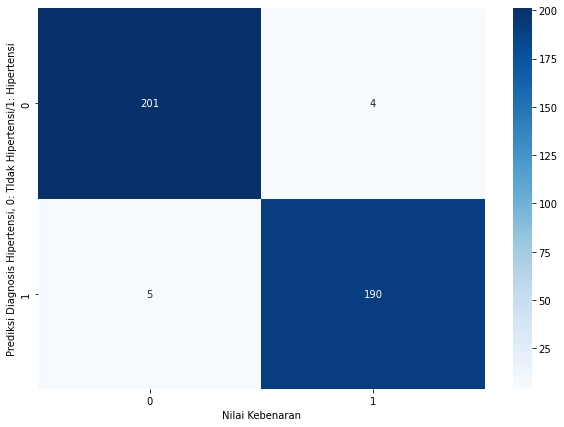

In [76]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions = svm_rbf_4_pred_1)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Diagnosis Hipertensi, 0: TIdak Hipertensi/1: Hipertensi')

In [77]:
print("Akurasi =",accuracy_score(svm_rbf_4_pred_1, Y_test))
precision, recall, fscore, support = score(Y_test, svm_rbf_4_pred_1, average='weighted')
print("Presisi =", precision)
print("Recall =", recall)
print("F-score =", fscore)

Akurasi = 0.9775
Presisi = 0.977509133219898
Recall = 0.9775
F-score = 0.9774984519542904


## 5-FOLD CROSS VALIDATION

In [78]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Diagnosis, Length: 2000, dtype: int64

In [79]:
def get_metrics(estimator, X, y):
    precision = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='precision')
    recall = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='recall')
    accuracy = cross_val_score(estimator, X, y, cv=KFold(n_splits=5), scoring='accuracy')
    return precision, recall, accuracy

precision, recall, accuracy = get_metrics(svm_rbf_4_1, X, Y)

df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'Accuracy': accuracy
})
print(df)

df.to_csv('metrics_scores.csv', index=False)

   Precision    Recall  Accuracy
0   0.957983  0.942149    0.9700
1   0.975904  0.975904    0.9900
2   0.972477  0.946429    0.9775
3   1.000000  0.936620    0.9550
4   1.000000  0.965000    0.9650


In [80]:
# Pengaturan model SVM
# model = SVC().fit(X_train, Y_train)
predicted = testing.predict(X_train)

# Get support vector indices
support_vector_indices = testing.support_
print(support_vector_indices)

[   4   44   50   57   72   99  126  137  139  156  158  160  192  199
  209  235  242  267  279  291  328  347  358  375  409  412  438  439
  446  454  456  459  462  465  475  481  485  486  512  525  527  552
  591  595  596  610  629  635  647  650  655  657  663  664  667  690
  695  700  712  714  715  718  753  763  768  772  793  807  808  815
  831  859  865  866  868  870  874  889  896  910  921  948  956  957
  979  983 1010 1012 1028 1045 1049 1052 1066 1067 1073 1077 1079 1093
 1096 1109 1133 1151 1156 1159 1162 1184 1226 1239 1245 1254 1256 1257
 1259 1285 1286 1291 1293 1299 1335 1348 1352 1355 1361 1368 1373 1377
 1381 1386 1404 1417 1435 1441 1467 1468 1485 1515 1533 1535 1554 1577
    1    6    9   26   59  140  167  175  178  197  203  208  216  219
  221  224  236  239  261  268  276  281  285  287  299  317  343  360
  373  397  419  423  427  435  450  452  488  510  520  521  532  537
  547  553  558  559  564  597  600  622  630  641  673  703  717  719
  723 

In [81]:
# Get number of support vectors per class
support_vectors_per_class = testing.n_support_
print(support_vectors_per_class)

[140 139]


In [82]:
X_train

array([[-0.1153237 , -0.51655108,  2.74055438, ...,  0.60536617,
        -2.20084845,  1.41010686],
       [-0.1153237 , -0.51655108, -0.36488968, ...,  0.26518323,
         0.24231553,  1.81880881],
       [-0.1153237 , -0.51655108, -0.36488968, ..., -1.22311712,
        -2.03235439, -1.24645579],
       ...,
       [-0.1153237 , -0.51655108, -0.36488968, ...,  0.5628433 ,
         1.25327994,  0.45646899],
       [-0.1153237 , -0.51655108, -0.36488968, ..., -0.45770551,
        -0.43166074, -0.63340287],
       [-0.1153237 , -0.51655108,  2.74055438, ..., -0.88293418,
        -0.34741371,  0.66081996]])

# Visualization with SVM

In [83]:
# mengambil dua kolom terakhir dr atribut
X = dataset[["SISTOL", "DIASTOL"]]
Y = dataset["Diagnosis"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [84]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

No handles with labels found to put in legend.


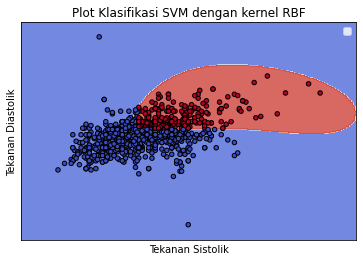

In [85]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(X_train, Y_train, h=.05):
    x_min, x_max = X_train.min() - 1, X_train.max() + 1
    y_min, y_max = Y_train.min() - 1, Y_train.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# model = svm.SVC(kernel='linear')
# testing = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(X_train, Y_train)
clf = svm_rbf_4_1.fit(X_train, Y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Plot Klasifikasi SVM dengan kernel RBF')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Tekanan Diastolik')
ax.set_xlabel('Tekanan Sistolik')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [86]:
# mengambil dua kolom terakhir dr atribut
# X_2 = dataset[["KURANG MAKAN BUAH DAN SAYUR", "LEMAK BERLEBIHAN"]]
# X_2 = dataset[["MEROKOK", "KURANG AKTIFITAS FISIK"]]
# X_2 = dataset[["GULA BERLEBIHAN","GARAM BERLEBIHAN"]]
# X_2 = dataset[["KONSUMSI ALKOHOL","Usia"]]
X_2 = dataset[["DIASTOL","SISTOL"]]
# X_2 = dataset[["KONSUMSI ALKOHOL","SISTOL"]]
Y_2 = dataset["Diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.2)

In [87]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

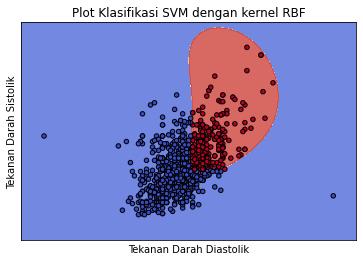

In [88]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(X_train, Y_train, h=.01):
    x_min, x_max = X_train.min() - 1, X_train.max() + 1
    y_min, y_max = Y_train.min() - 1, Y_train.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# model = svm.SVC(kernel='linear')
# testing = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(X_train, Y_train)
svm_rbf_4_1 = svm.SVC(kernel='rbf', C=100, gamma = 0.1).fit(X_train, Y_train)
clf = svm_rbf_4_1.fit(X_train, Y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Plot Klasifikasi SVM dengan kernel RBF')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('Tekanan Darah Diastolik')
ax.set_ylabel('Tekanan Darah Sistolik')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# ax.legend()
plt.show()